# Webscraping Alibaba with Scrapy
<img src="https://mms.businesswire.com/media/20171119005069/en/625587/5/Alibaba+Group.jpg" alt="Alibaba logo" title="Alibaba logo" />


Alibaba, one of Amazon's largest competitors in the e-commerce space, primarily deals with selling items for wholesale price at wholesale quantities. This notebook contains a Scrapy Spider script which will scrape the most popular items per category on Alibaba, then methods to clean the raw data and visualizations on the median price and median minimum order amount. 

### Example of Data To Be Scraped
<img src='https://i.imgur.com/PWyBBWA.png'/>

# Initialize and Run Scrapy Spider, Store Results in JSON

In [161]:
import scrapy
from scrapy.selector import Selector
from scrapy.http import HtmlResponse, Request, Response
import requests
from scrapy.http import TextResponse
from scrapy.crawler import CrawlerProcess
import json
import logging
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
url_to_scan=['https://www.alibaba.com//Mobile-Phone-Bags-Cases_pid380230?spm=a2700.8270666-44.201612262000.62.10ccb75aDPFCka',\
             'https://www.alibaba.com//Earphone-Headphone_pid63705?spm=a2700.8270666-44.201612262000.69.10ccb75aDPFCka',\
            'https://www.alibaba.com//Mobile-Phones_pid5090301?spm=a2700.8270666-44.201612262000.76.10ccb75aDPFCka',\
            'https://www.alibaba.com//Power-Banks_pid100009648?spm=a2700.8270666-44.201612262000.83.10ccb75aDPFCka',\
            'https://www.alibaba.com//Mobile-Phone-Holders_pid5093004?spm=a2700.8270666-44.201612262000.90.10ccb75aDPFCka',\
            'https://www.alibaba.com//Charger_pid410299?spm=a2700.8270666-44.201612262000.97.10ccb75aDPFCka',\
            'https://www.alibaba.com//Screen-Protector_pid4408?spm=a2700.8270666-44.201612262000.104.10ccb75aDPFCka',\
            'https://www.alibaba.com//Speaker_pid518?spm=a2700.8270666-44.201612262000.111.10ccb75aDPFCka',\
            'https://www.alibaba.com//Mobile-Phone-LCDs_pid5904002?spm=a2700.8270666-44.201612262000.118.10ccb75aDPFCka',\
            'https://www.alibaba.com//Set-Top-Box_pid5092303?spm=a2700.8270666-44.201612262000.125.10ccb75aDPFCka',\
            'https://www.alibaba.com//Snack-Machines_pid100007150?spm=a2700.8270666-43.201612262000.75.feb42f91OJA92v',\
            'https://www.alibaba.com//Filling-Machines_pid100006856?spm=a2700.8270666-43.201612262000.82.feb42f91OJA92v',\
             'https://www.alibaba.com//Construction-Machinery-Parts_pid1355?spm=a2700.8270666-43.201612262000.89.feb42f91OJA92v',\
             'https://www.alibaba.com//Digital-Printers_pid100006871?spm=a2700.8270666-43.201612262000.96.feb42f91OJA92v',\
             'https://www.alibaba.com//Mixing-Equipment_pid141607?spm=a2700.8270666-43.201612262000.103.feb42f91OJA92v',\
             'https://www.alibaba.com//Forklifts_pid142906?spm=a2700.8270666-43.201612262000.110.feb42f91OJA92v',\
             'https://www.alibaba.com//Agriculture-Machinery-Parts_pid134?spm=a2700.8270666-43.201612262000.117.feb42f91OJA92v',\
             'https://www.alibaba.com//Fruit-Vegetable-Processing-Machines_pid100006961?spm=a2700.8270666-43.201612262000.124.feb42f91OJA92v',\
             'https://www.alibaba.com//Towel_pid403?spm=a2700.8270666-15.201612262000.76.4b8b1990QsHlS1',\
             'https://www.alibaba.com//Mugs_pid100004982?spm=a2700.8270666-15.201612262000.83.4b8b1990QsHlS1',\
             'https://www.alibaba.com//Blanket_pid40602?spm=a2700.8270666-15.201612262000.90.4b8b1990QsHlS1',\
             'https://www.alibaba.com//Water-Bottles_pid100004985?spm=a2700.8270666-15.201612262000.97.4b8b1990QsHlS1',\
             'https://www.alibaba.com//Auto-Lighting-System_pid120206?spm=a2700.8270666-34.201612262000.76.ff987c1d3PFYmQ',\
             'https://www.alibaba.com//Motorcycles_pid1203?spm=a2700.8270666-34.201612262000.83.ff987c1d3PFYmQ',\
             'https://www.alibaba.com//Tires_pid12020803?spm=a2700.8270666-34.201612262000.90.ff987c1d3PFYmQ',\
             'https://www.alibaba.com//Navigation-GPS_pid340404?spm=a2700.8270666-34.201612262000.111.ff987c1d3PFYmQ',\
             'https://www.alibaba.com//Men-s-T-Shirts_pid100003071?spm=a2700.8270666-3.201612262000.78.7dc77acdZQfaRe',\
             'https://www.alibaba.com//Swimwear-Beachwear_pid100003332?spm=a2700.8270666-3.201612262000.85.7dc77acdZQfaRe',\
             'https://www.alibaba.com//Fitness-Yoga-Wear_pid100003339?spm=a2700.8270666-3.201612262000.92.7dc77acdZQfaRe',\
             'https://www.alibaba.com//Hair-Extension_pid66030104?spm=a2700.8270666-66.201612262000.75.43465d09K2TOsh',\
             'https://www.alibaba.com//Multi-Functional-Beauty-Equipment_pid100000973?spm=a2700.8270666-66.201612262000.110.43465d09K2TOsh',\
             'https://www.alibaba.com//Cosmetic-Bags-Cases_pid152407?spm=a2700.8270666-66.201612262000.96.43465d09K2TOsh',\
             'https://www.alibaba.com//Other-Fitness-Bodybuilding-Products_pid100005768?spm=a2700.8270666-18.201612262000.77.2de968feJiXvuq',\
             'https://www.alibaba.com//Packaging-Boxes_pid2303?spm=a2700.8270666-23.201612262000.57.48ab7587xjOBk4',
            ]

In [2]:
open_file='results/result.jl'
open_file2='results/result.json' 
class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open(open_file, 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item
    
class Ali_Spider(scrapy.Spider):
    name = "alibaba"
    start_urls = url_to_scan
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': open_file2,                       # Used for pipeline 2
        'DOWNLOAD_DELAY': 1.5
    }
    def parse(self, response):
        #extract
        item_type=response.selector.xpath('//title/text()').extract()
        item_title=response.selector.xpath('//h2[@class="title"]/a/text()').extract()
        seller_title=response.selector.xpath('//div[@class="stitle"]/a/text()').extract()
        price=response.selector.xpath('//div[@class="price"]/b/text()').extract()
        min_order=response.selector.xpath('//div[@class="min-order"]/b/text()').extract()
        item_type=item_type*len(item_title)

        for item in zip(item_title,seller_title,price,min_order,item_type):
            scraped_info = {
            'item_title': item[0],
            'seller_title': item[1],
            'price': item[2],
            'min_order': item[3],
            'item_type': item[4]
            }
            yield scraped_info

In [3]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(Ali_Spider)
process.start(stop_after_crawl=True)

2018-04-25 19:57:34 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2018-04-25 19:57:34 [scrapy.utils.log] INFO: Versions: lxml 4.1.1.0, libxml2 2.9.4, cssselect 1.0.3, parsel 1.4.0, w3lib 1.19.0, Twisted 17.5.0, Python 2.7.14 |Anaconda custom (64-bit)| (default, Dec  7 2017, 11:07:58) - [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 17.5.0 (OpenSSL 1.0.2o  27 Mar 2018), cryptography 2.1.4, Platform Darwin-17.4.0-x86_64-i386-64bit
2018-04-25 19:57:34 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'results/result.json', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)', 'DOWNLOAD_DELAY': 1.5}


In [4]:
!tail -n 2 results/result.jl

{"item_title": "Fancy OEM logo black rigid cardboard drawer paper gift box packaging sliding paper box packaging", "min_order": "1 Piece", "seller_title": "Shenzhen Twinkle Printing And Packaging Co., Ltd.", "price": " US $0.48-1.08 ", "item_type": "Packaging Boxes, Meal Box Products, Giant Online Manufacturers, Br Online Suppliers and Exporters Directory "}
{"item_title": "Printed Paper Box With Clear Acerate Clear Lid top and BOTTOM STYLE flower packaging box", "min_order": "100 Sets", "seller_title": "Shenzhen Sinmenda Industry Co., Ltd.", "price": " US $1.35-4.82 ", "item_type": "Packaging Boxes, Meal Box Products, Giant Online Manufacturers, Br Online Suppliers and Exporters Directory "}


In [20]:
dfjson = pd.read_json('results/result.json')
dfjson.head()
#dfjson.to_csv('df_output.csv', encoding='utf-8',index=False)

,item_title,item_type,min_order,price,seller_title
0,Outdoor/Patio Waterproof Swing Seat Cover,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",200 Pieces,US $6.5-15,"Shaoxing Green Cleanness Things Co., Ltd."
1,China Wholesale TPU Creative Playable Classic ...,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",10 Pieces,US $6.2-8.3,"Shenzhen Doublepow Energy Technology Co., Ltd."
2,New design microfiber mobile phone pouch,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",6000 Pieces,US $0.05-0.5,"Wuxi Xinya Micro Fibrous Co., Ltd."
3,Phone accessories mobile Phone case wallet lea...,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",50 Pieces,US $4.99-11.99,"Guangzhou Aivi Leather Co., Ltd."
4,Electric Switches Design Silicone Rubber Toggl...,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",1000 Pieces,US $0.2-0.28,"Huizhou Dingshuai Silicone Products Co., Ltd."


# Data Cleaning and Visualization
The data types for all columns are in string values. Minimum order and price need to be cleaned and turned into numerical data types.

In [127]:
# create features from raw data
dfjson['min_order']=dfjson['min_order'].apply(lambda x: re.sub("\D",'', x))
dfjson['price']=dfjson['price'].apply(lambda x: re.sub("[^\d\.\-]",'', x))
dfjson['min_price']=dfjson['price'].apply(lambda x: float(x.split('-')[0]))
dfjson['max_price']=dfjson['price'].apply(lambda x: float(x.split('-')[1]) \
                                          if x.split('-')[1].replace(".","").isdigit() \
                                          else float(x.split('-')[0]))
dfjson['mean_price']=dfjson[['min_price','max_price']].mean(axis=1)

In [135]:
dfjson.head()

,item_title,item_type,min_order,price,seller_title,min_price,max_price,mean_price
0,Outdoor/Patio Waterproof Swing Seat Cover,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",200,6.5-15,"Shaoxing Green Cleanness Things Co., Ltd.",6.50,15.00,10.750
1,China Wholesale TPU Creative Playable Classic ...,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",10,6.2-8.3,"Shenzhen Doublepow Energy Technology Co., Ltd.",6.20,8.30,7.250
2,New design microfiber mobile phone pouch,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",6000,0.05-0.5,"Wuxi Xinya Micro Fibrous Co., Ltd.",0.05,0.50,0.275
3,Phone accessories mobile Phone case wallet lea...,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",50,4.99-11.99,"Guangzhou Aivi Leather Co., Ltd.",4.99,11.99,8.490
4,Electric Switches Design Silicone Rubber Toggl...,"Mobile Phone Bags & Cases, Mobile Phone Bags &...",1000,0.2-0.28,"Huizhou Dingshuai Silicone Products Co., Ltd.",0.20,0.28,0.240


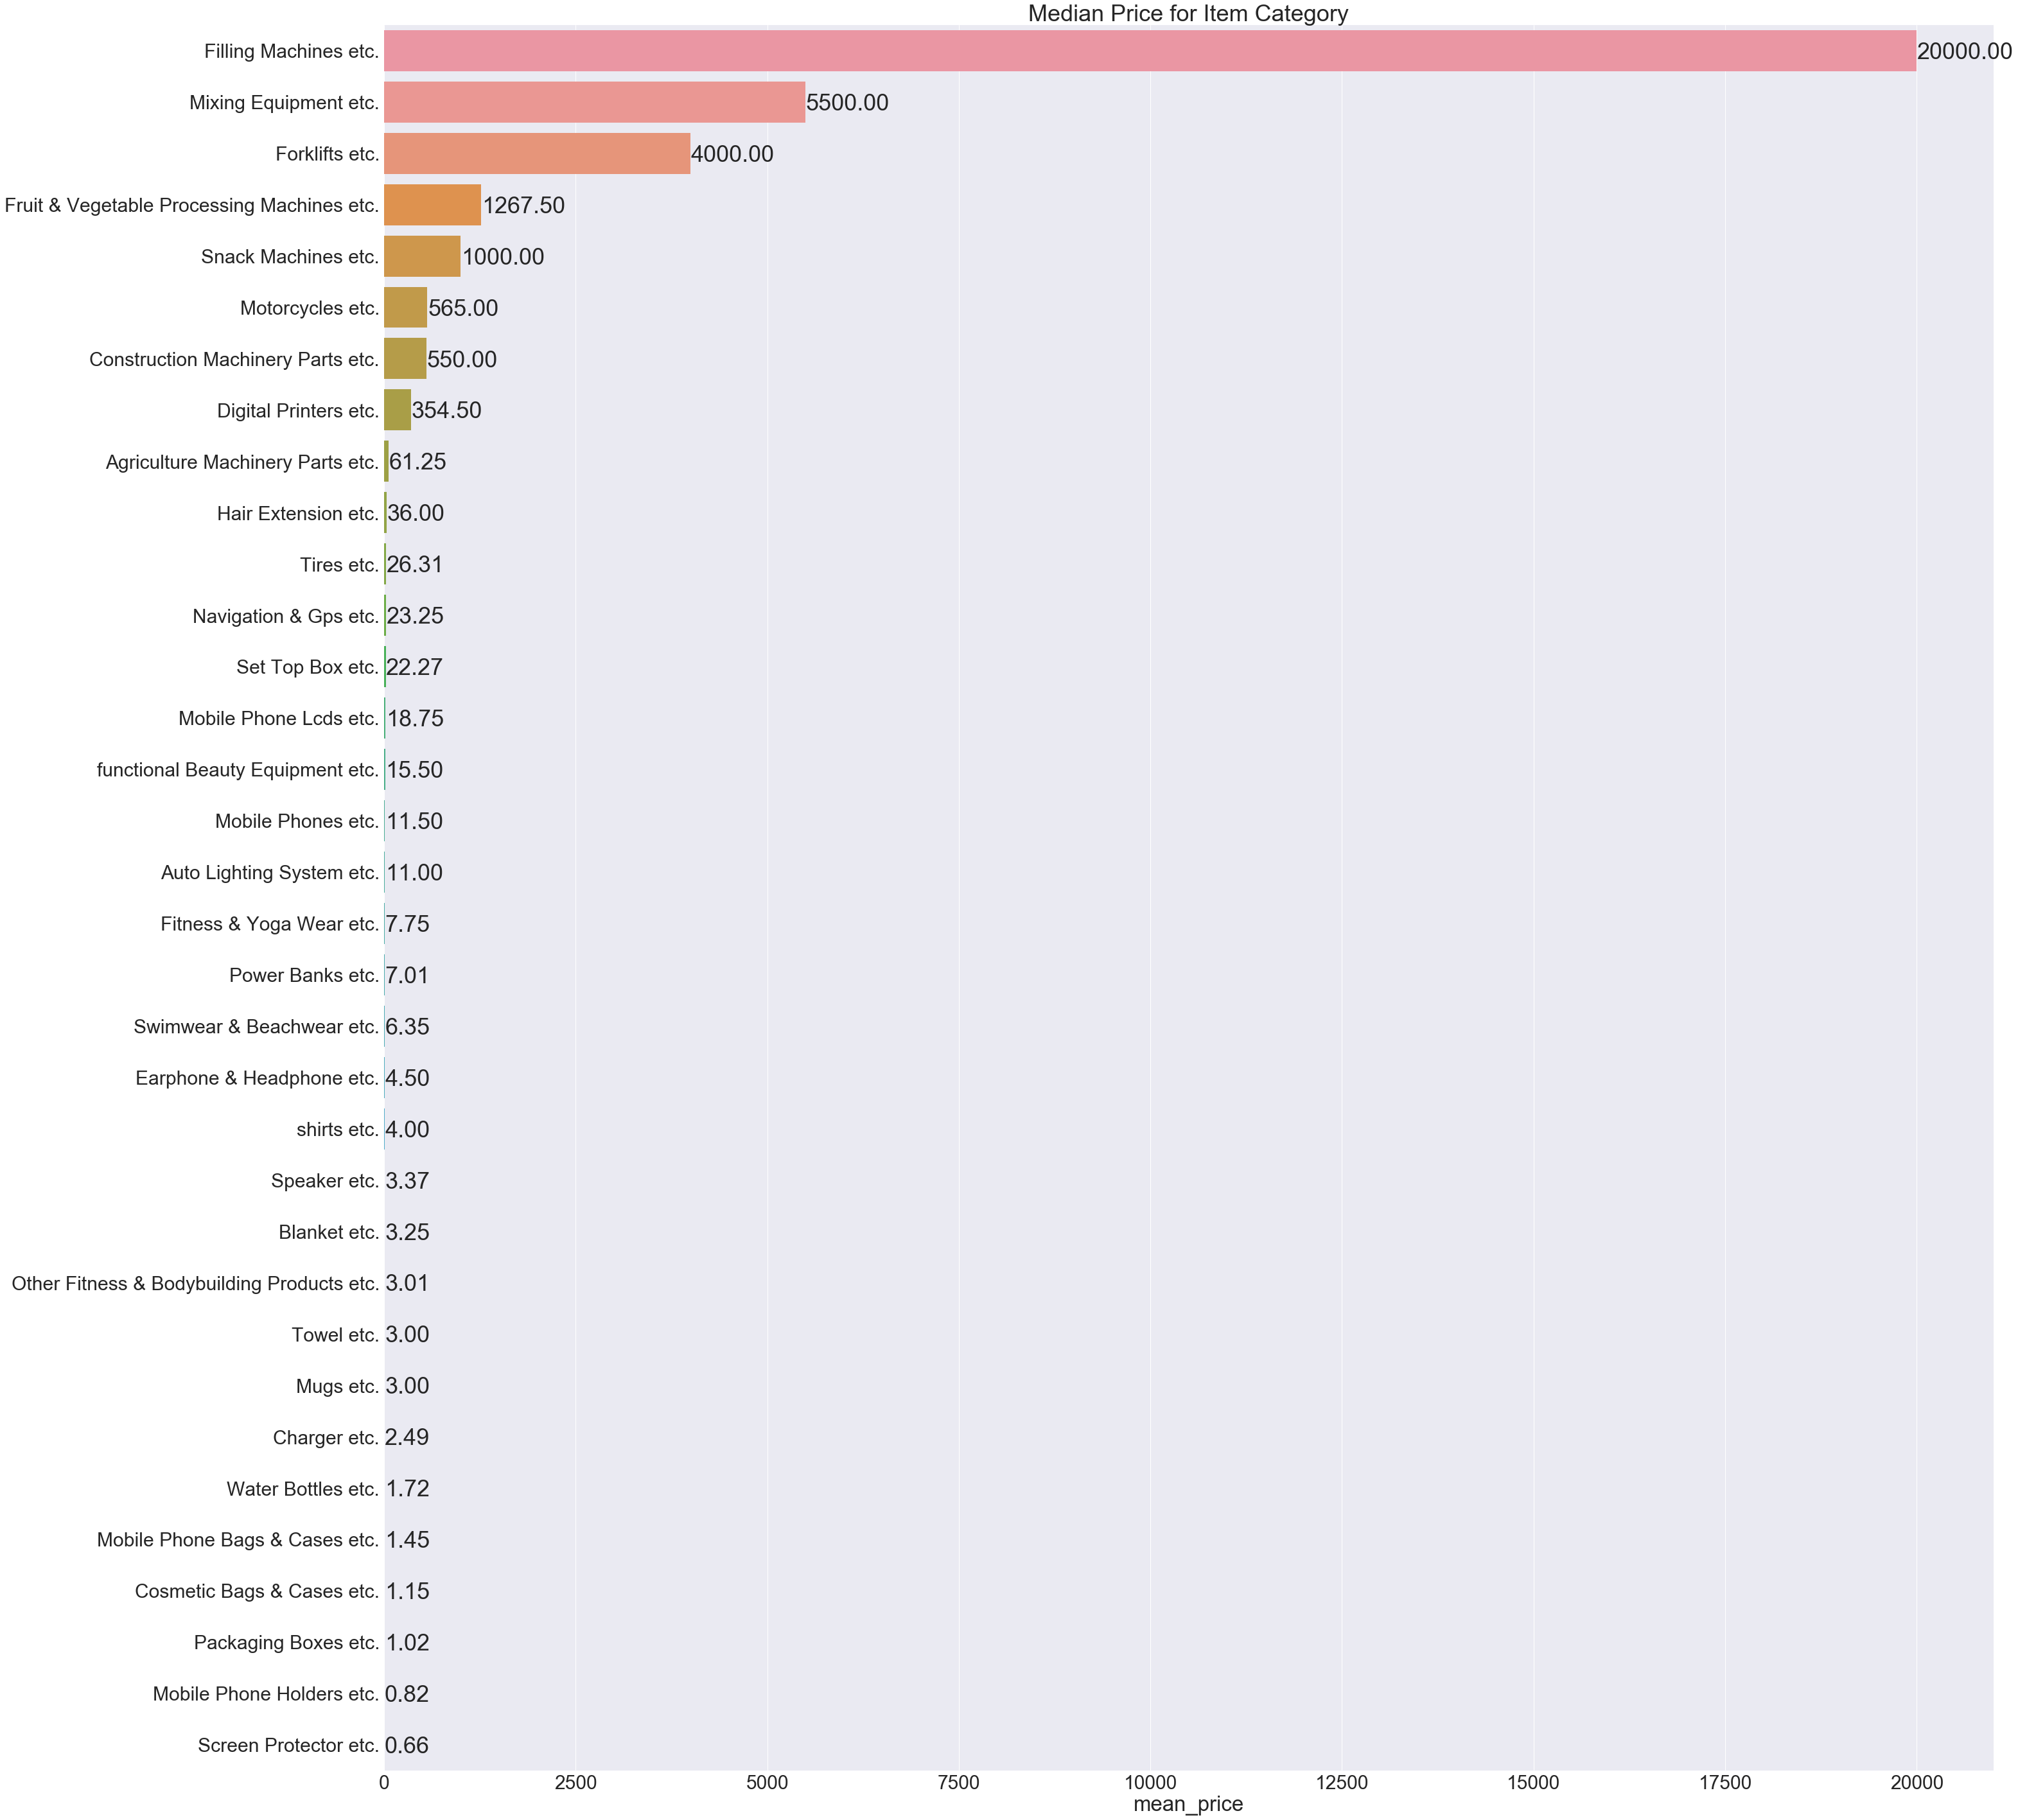

In [189]:
sns.set(font_scale=3)
plt.figure(figsize=(40,50))
plt.title('Median Price for Item Category')
ax=sns.barplot(y=[re.findall(regex,i)[0].replace(",","") + " etc." for i in dfjson.groupby('item_type')['mean_price'].median().sort_values(ascending=False).index.tolist()],\
            x=dfjson.groupby('item_type')['mean_price'].median().sort_values(ascending=False),orient='h')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 
plt.show()

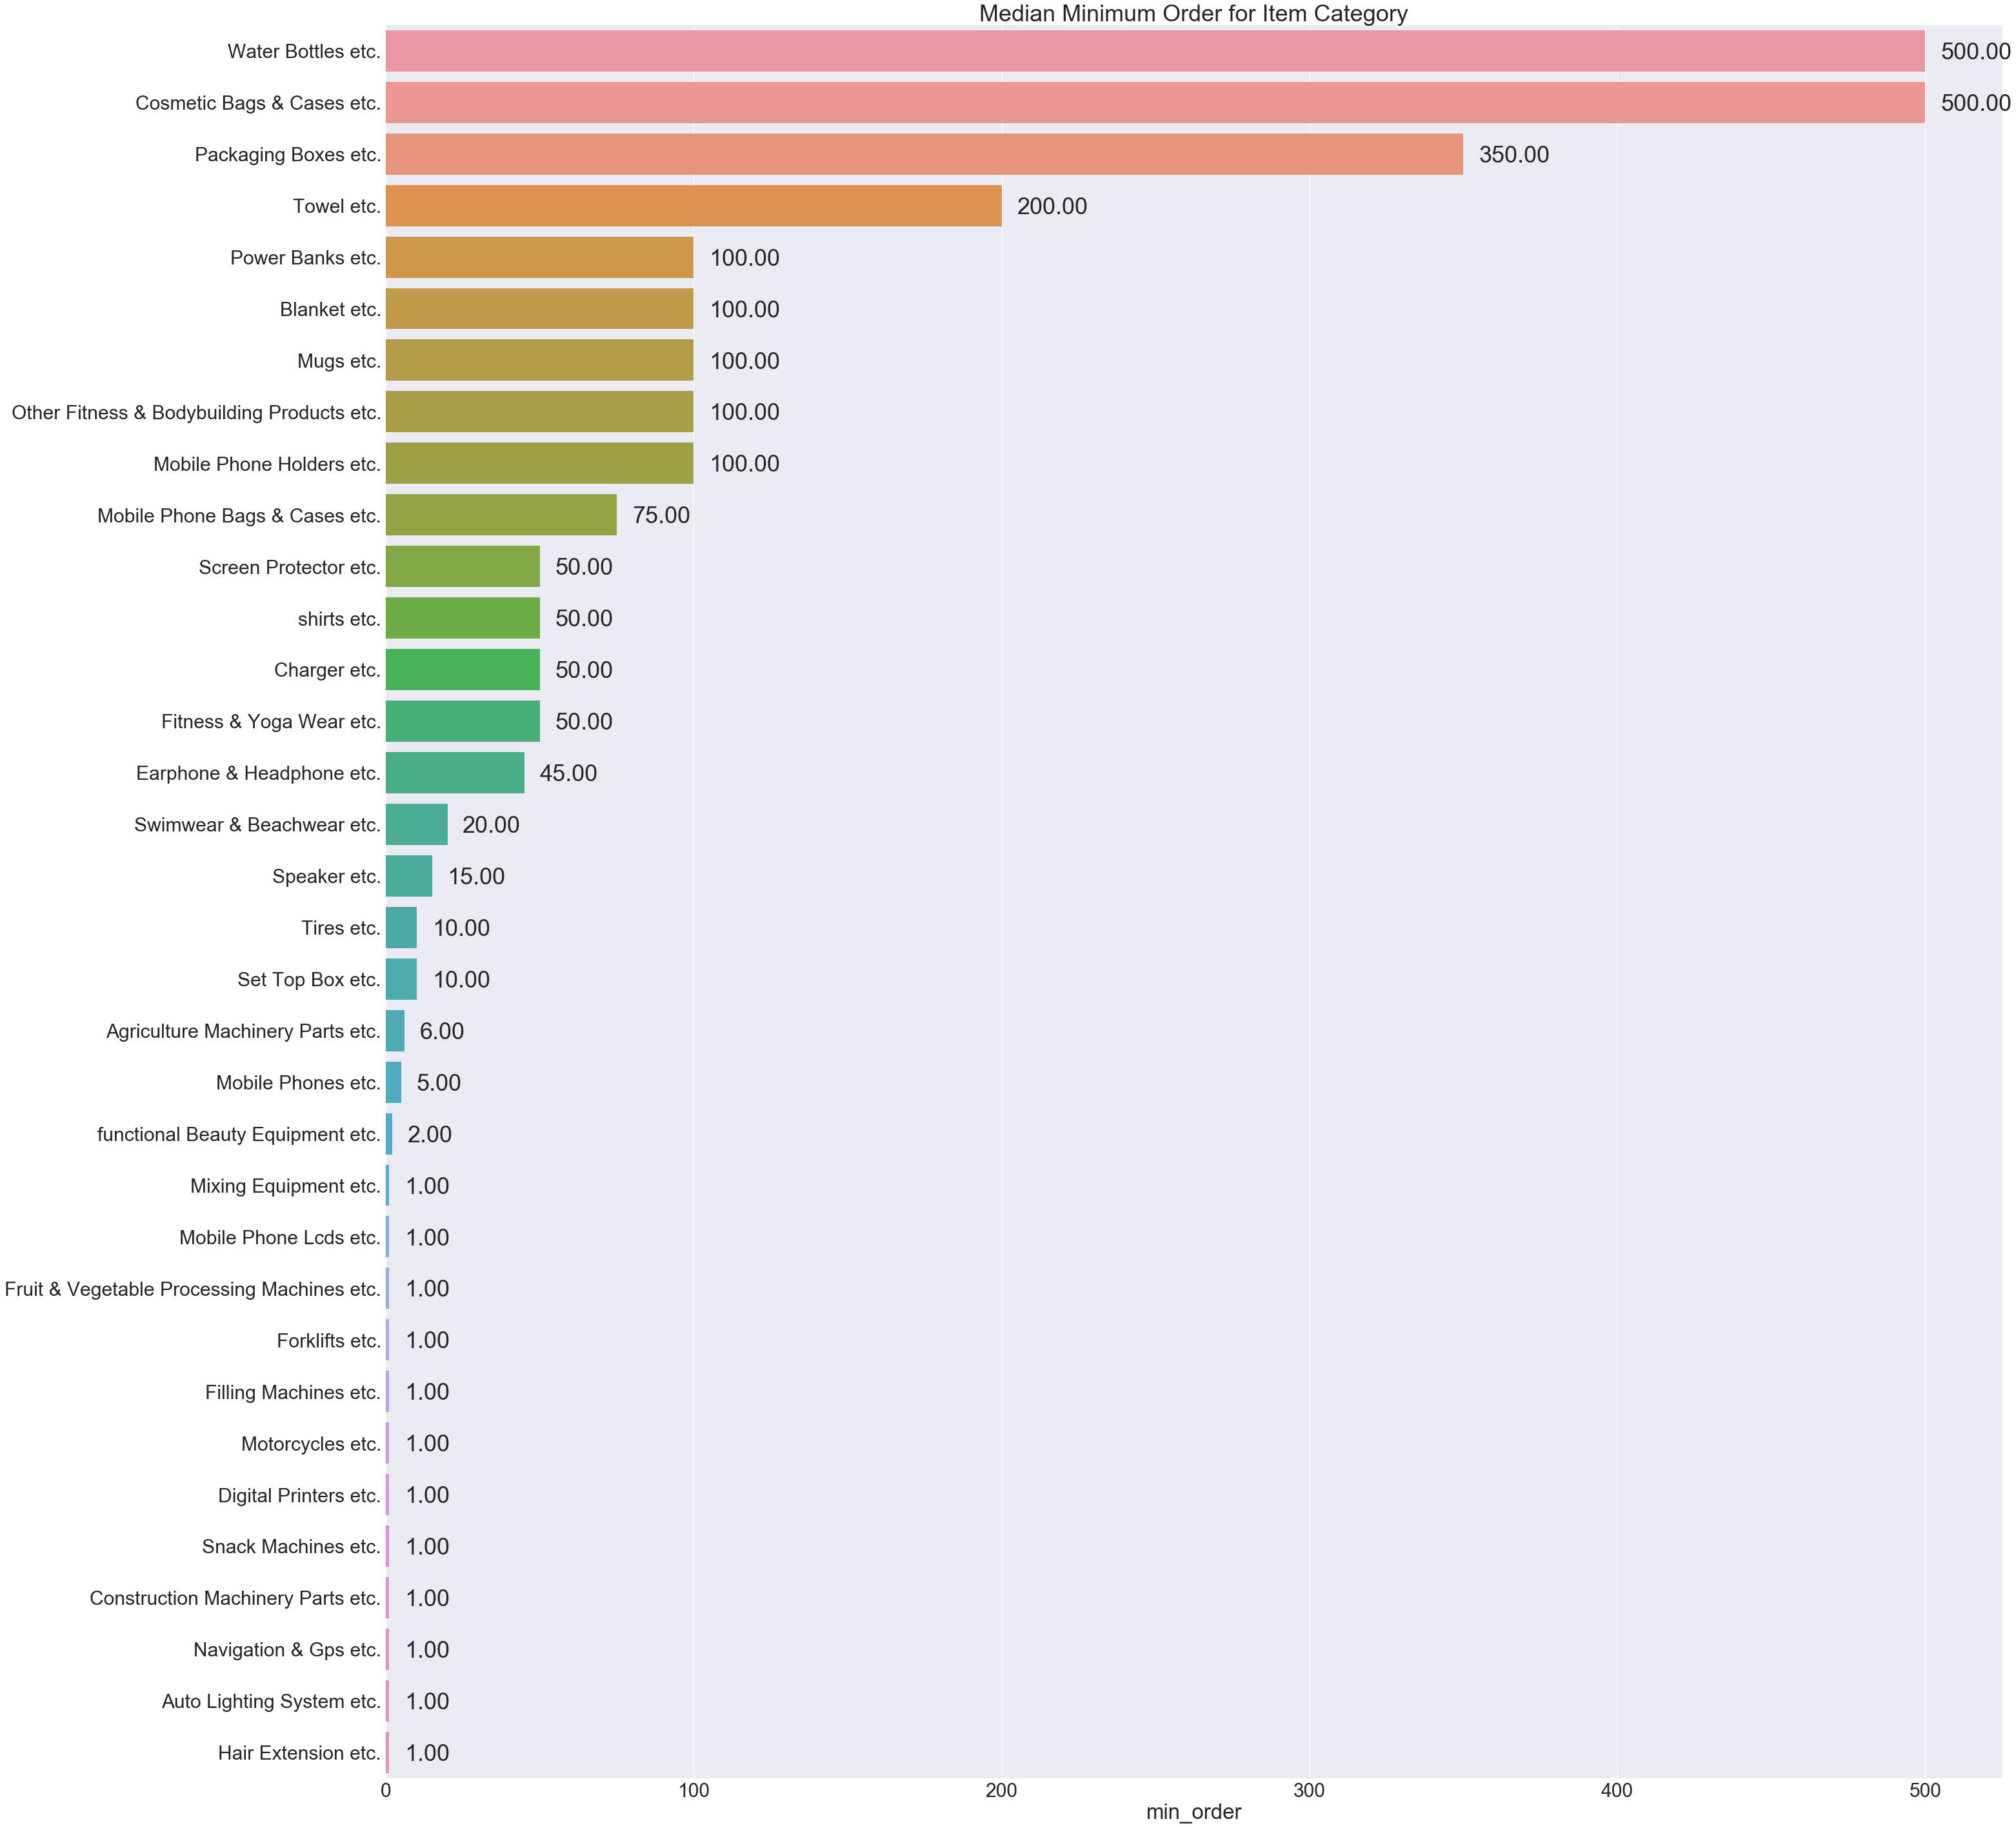

In [190]:
dfjson['min_order']=dfjson['min_order'].apply(pd.to_numeric)

sns.set(font_scale=3)
plt.figure(figsize=(40,50))
plt.title('Median Minimum Order for Item Category')
ax=sns.barplot(y=[re.findall(regex,i)[0].replace(",","") + " etc." for i in dfjson.groupby('item_type')['min_order'].median().sort_values(ascending=False).index.tolist()],\
            x=dfjson.groupby('item_type')['min_order'].median().sort_values(ascending=False),orient='h')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 
plt.show()

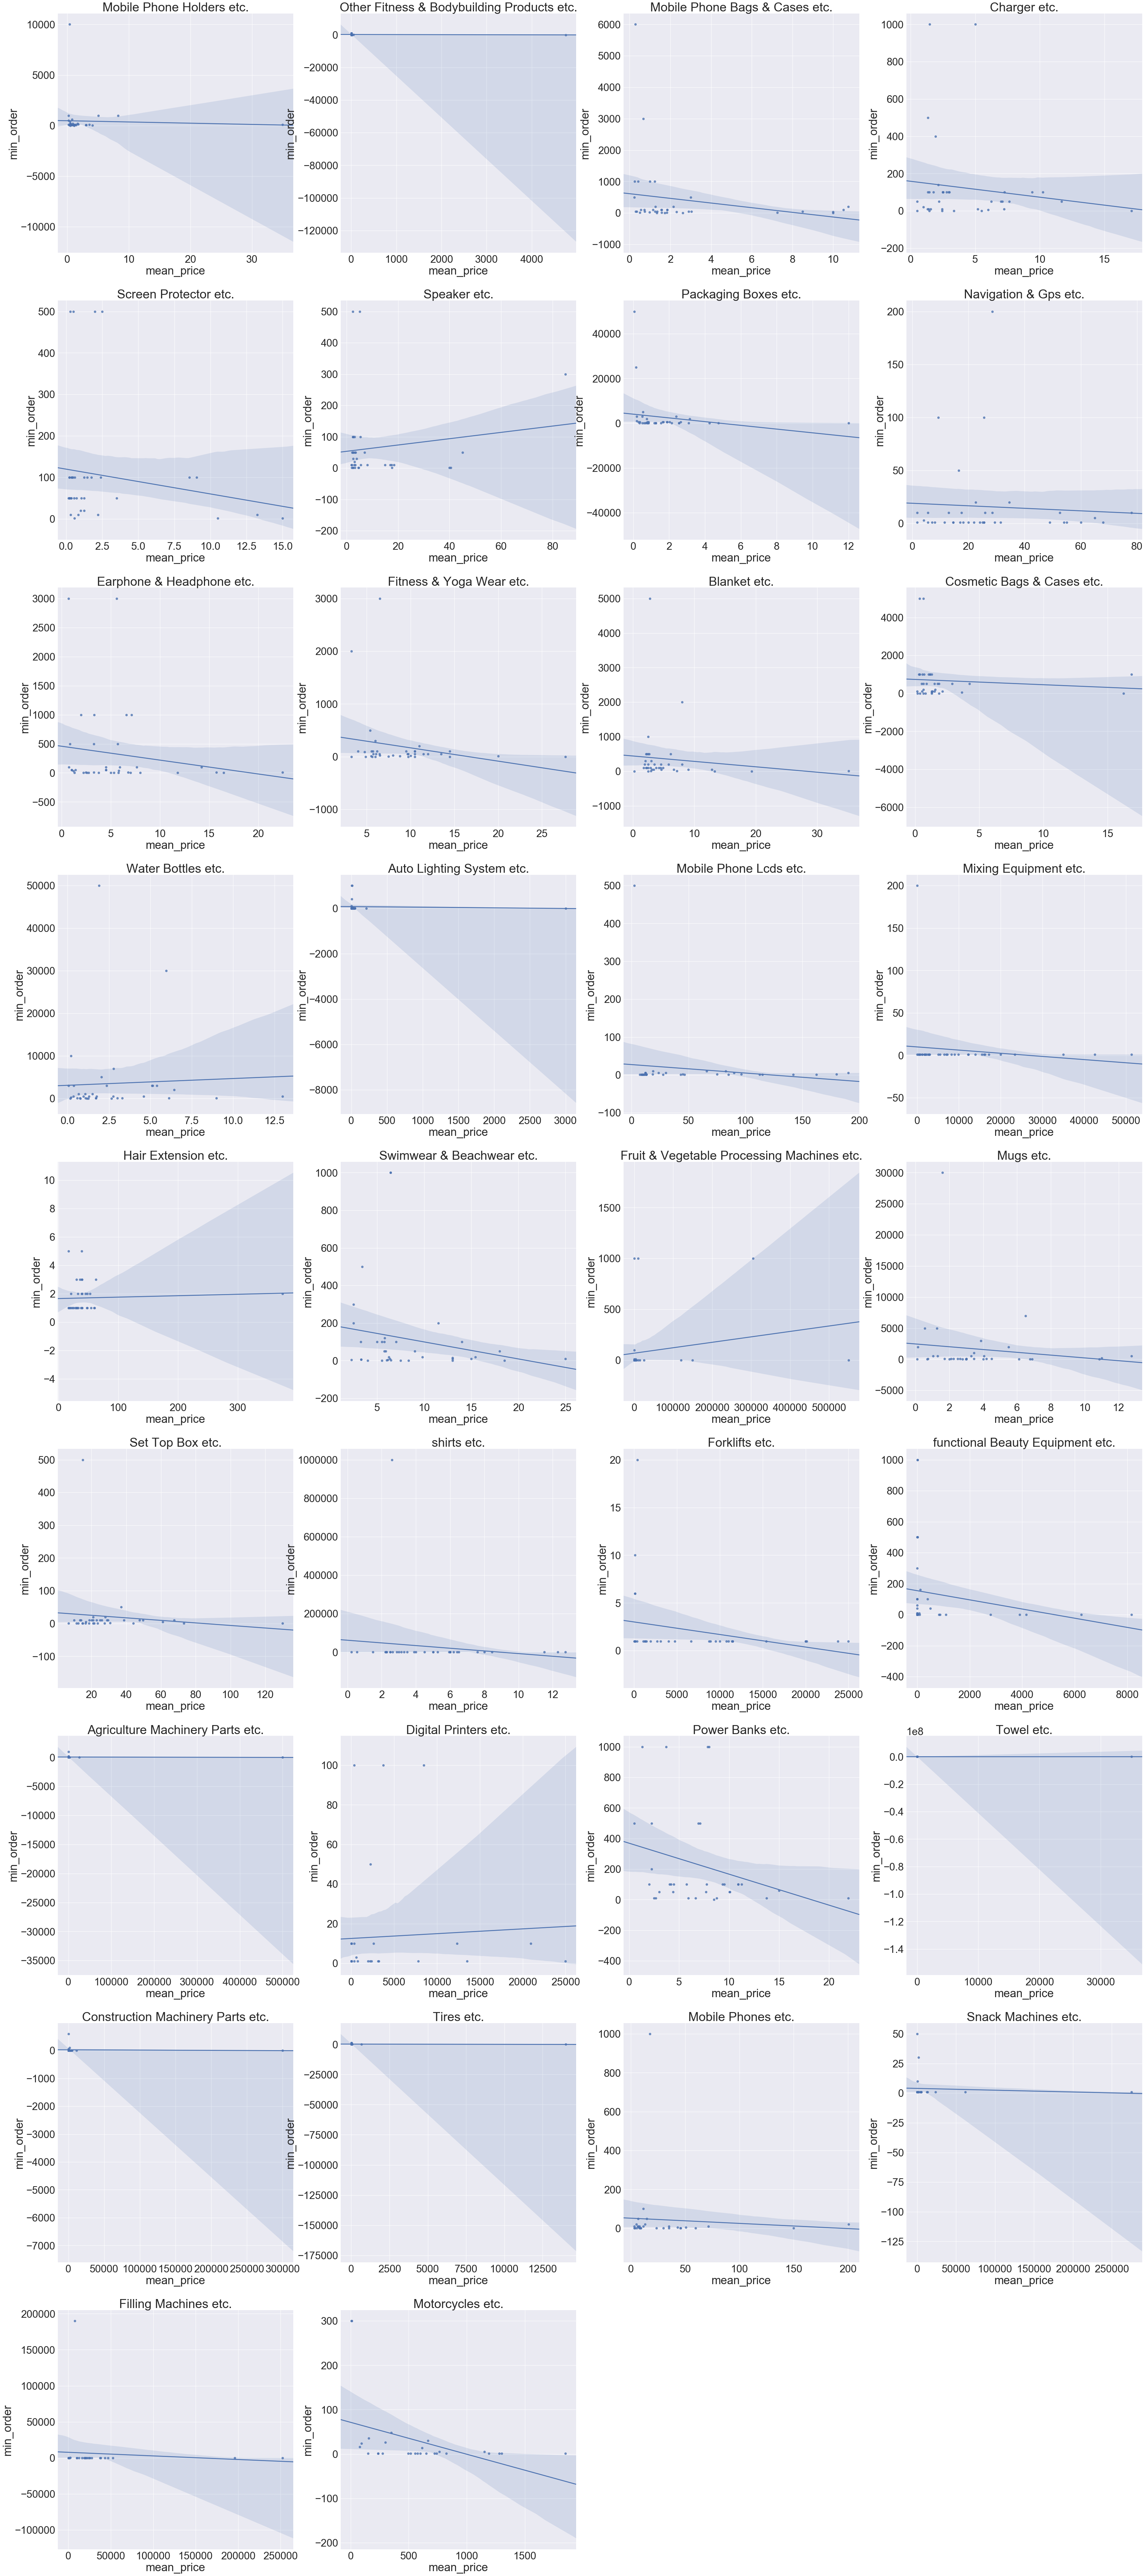

In [223]:
plt.figure(figsize=(50,150))
dfjson['item_type_abbrev']=dfjson['item_type'].apply(lambda x: re.findall(regex,x)[0].replace(",","") + " etc.")
item_categories=dfjson['item_type_abbrev'].value_counts().index.tolist()

for i in item_categories:
    plt.subplot(10,4,item_categories.index(i)+1)
    plt.title(i)
    sns.regplot(data=dfjson[dfjson.item_type_abbrev==i],x='mean_price',y='min_order')

# Observations
Not surprisingly, heavy machinery (Filing Machines, Mixing Equipment, and Forklifts) tends to be the most expensive per unit price, while small plastics (Screen Protectors and Water Bottles) tend to the least expensive per unit price. Additionally, for most item categories, there is a negative correlation between mean price per item and minimum order per item, meaning it appears that manufacturers try to sell cheap goods in bulk or sell high quality/expensive-to-make goods in lower quantities.